# **Shopping Cart Database Deep Analysis - Knightbearr**

# **Introduction**


بسم الله الرحمن الرحيم

السلام عليكم ورحمة الله وبركاته

Hello fellow kagglers! My name is Azmi, this is my second public notebook Deep Analysis that I made, please give me an upvote if you like it! and please, leave me your feedback, Hope you like it! In this notebook we're going to Analyst Shopping Cart Database by doing so we're going to get some insights.

I'm planning to go through feature (question) by feature and take closer look those features to inspect their relationships with previous features. So it's gonna take a while to finish this notebook with all features involved. I'm planning to update it regulary whenever I have free time.

*Sorry if my English is bad :') hope you like it!*

# **Context**

This dataset contains synthetic data generated by the Dataset Owner for one of the courses at Carnegie Mellon University.

# **Content**

Example file structure
```
shopping_car_data <- top level folder
└───customer.csv
│   └───customers data     
└───orders.csv
│   └───orders data  
└───product.csv
│   └───product data  
└───sales.csv
    └───sales data  
 ```

# **Inspiration**

Several deductions and analyses can be drawn from this data, including:

* Which products were sold the most in the last month?
* How have sales and revenue changed over the past few quarters?
* Understanding Customer demographics and their preferences

Okay, let's get started....

Wait...

**Note:** *before you read this analysis, it would be nice to prepare snacks and coffee to accompany you*

Are you done? Okay, let's start!

# **Import Libraries**

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
plt.style.use('fivethirtyeight')
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 30)

print("setup-complete!")

setup-complete!


# **Read-in Data**

In [2]:
# Accomodate raw path to variables
raw_customer, raw_orders = "../input/shopping-cart-database/customers.csv", "../input/shopping-cart-database/orders.csv"
raw_products, raw_sales = "../input/shopping-cart-database/products.csv", "../input/shopping-cart-database/sales.csv"

# Read-in data
customer, order = pd.read_csv(raw_customer), pd.read_csv(raw_orders)
product, sales = pd.read_csv(raw_products), pd.read_csv(raw_sales)

## **Merging data**

Let's merge customers, orders, and product data since it's have the same rows...

In [3]:
cust_order = pd.merge(left=customer, right=order, 
                      left_index=True, right_index=True) # merging
cop_data = pd.merge(left=cust_order, right=product, 
                    left_index=True, right_index=True) # merging

# **Check Data**

Let's see the data and how it looks.

In [4]:
cop_data # check customer, order, and product data

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-8-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-2-3,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,3,Shina Dullaghan,Polygender,59,269 Gemma SummitSuite 109,5661,Aliburgh,Australian Capital Territory,Australia,3,774,46763,2021-10-8,2021-11-03,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,4,Hewet McVitie,Bigender,67,743 Bailey GroveSuite 141,1729,South Justinhaven,Queensland,Australia,4,433,39782,2021-5-6,2021-05-19,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,5,Rubia Ashleigh,Polygender,30,48 Hyatt ManorSuite 375,4032,Griffithsshire,Queensland,Australia,5,441,14719,2021-3-23,2021-03-24,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia,996,345,37843,2021-1-13,2021-02-02,995,Trousers,Wool,XS,green,111,73,"A green coloured, XS sized, Wool Trousers"
996,997,Dickie Grushin,Non-binary,30,04 Howell PassSuite 209,6950,Ellaborough,Tasmania,Australia,997,346,53831,2021-1-18,2021-01-31,996,Trousers,Wool,S,green,111,43,"A green coloured, S sized, Wool Trousers"
997,998,Rebecka Fabler,Polygender,32,72 Annabelle PassApt. 446,52,Kohlerberg,Queensland,Australia,998,407,53308,2021-5-5,2021-05-21,997,Trousers,Wool,M,green,111,41,"A green coloured, M sized, Wool Trousers"
998,999,Carita Vynarde,Polygender,30,170 Wilson AvenueApt. 577,7849,East Oscarfurt,Western Australia,Australia,999,428,31643,2021-6-15,2021-07-12,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers"


> `cop_data` has $1000$ rows and $22$ columns, hmm, interesting, because in this data there is **customer name**, also **customer's full address**, I don't know if this data is ok to be retrieved published publicly because evil actions can happen at any time, and luckily I'm not a bad person, because I am a **Knight Bear** who is analyzing data and also discovering, and of course you all know, a knight never does evil , and really loves peace and serenity, okay, let's move on...

In [5]:
sales # let's check sales data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
0,0,1,218,106,2,212
1,1,1,481,118,1,118
2,2,1,2,96,3,288
3,3,1,1002,106,2,212
4,4,1,691,113,3,339
...,...,...,...,...,...,...
4995,4995,998,321,109,2,218
4996,4996,998,251,95,3,285
4997,4997,999,872,113,1,113
4998,4998,999,998,106,2,212


> `sales` data have $5000$ rows dan $6$ columns, and look like the data is not have any null-values.

In [6]:
cop_data.info() # Getting the information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id_x  1000 non-null   int64 
 1   customer_name  1000 non-null   object
 2   gender         1000 non-null   object
 3   age            1000 non-null   int64 
 4   home_address   1000 non-null   object
 5   zip_code       1000 non-null   int64 
 6   city           1000 non-null   object
 7   state          1000 non-null   object
 8   country        1000 non-null   object
 9   order_id       1000 non-null   int64 
 10  customer_id_y  1000 non-null   int64 
 11  payment        1000 non-null   int64 
 12  order_date     1000 non-null   object
 13  delivery_date  1000 non-null   object
 14  product_ID     1000 non-null   int64 
 15  product_type   1000 non-null   object
 16  product_name   1000 non-null   object
 17  size           1000 non-null   object
 18  colour         1000 non-null 

> Look like there's no null value, let's move on...

In [7]:
sales.info() # Getting the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sales_id        5000 non-null   int64
 1   order_id        5000 non-null   int64
 2   product_id      5000 non-null   int64
 3   price_per_unit  5000 non-null   int64
 4   quantity        5000 non-null   int64
 5   total_price     5000 non-null   int64
dtypes: int64(6)
memory usage: 234.5 KB


### **Uniqueness Categorical Variables**
Let's have a look at categorical variables. How many unique values of these variables.

In [8]:
categorical = cop_data.select_dtypes(["category", "object"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {cop_data[cat_col].nunique()} uniqueness variable(s)")

customer_name : 1000 uniqueness variable(s)
gender : 8 uniqueness variable(s)
home_address : 1000 uniqueness variable(s)
city : 961 uniqueness variable(s)
state : 8 uniqueness variable(s)
country : 1 uniqueness variable(s)
order_date : 291 uniqueness variable(s)
delivery_date : 305 uniqueness variable(s)
product_type : 3 uniqueness variable(s)
product_name : 28 uniqueness variable(s)
size : 5 uniqueness variable(s)
colour : 7 uniqueness variable(s)
description : 1000 uniqueness variable(s)


> Great!, let's check the Discrete and the Continuous variables...

### **Discrete and Continuous Variables**
Let's have a look at Discrete and Continuous variables.

In [9]:
numeric = sales.select_dtypes(["int", "float"]).columns
for num_col in numeric:
    print(f"{num_col} : {sales[num_col].nunique()} uniqueness variable(s)")

sales_id : 5000 uniqueness variable(s)
order_id : 993 uniqueness variable(s)
product_id : 1233 uniqueness variable(s)
price_per_unit : 23 uniqueness variable(s)
quantity : 3 uniqueness variable(s)
total_price : 69 uniqueness variable(s)


> Okay, look like there's no unique variable(s) in Discrete and Continuous data...

### **How many missing data points do we have?**

Let's see how many missing data we have in each column....

In [10]:
# Get the number of missing data points per column
missing_values_count = cop_data.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

customer_id_x    0
customer_name    0
gender           0
age              0
home_address     0
zip_code         0
city             0
state            0
country          0
order_id         0
dtype: int64

In [11]:
# Get the number of missing data points per column
missing_values_count = sales.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity          0
total_price       0
dtype: int64

> Great! look like the data is not have any missing values! okay, let's go to the next steps!

### **Convert Order Date column**
And let's convert Order Date column too, so we can take the Year, Month, and the other date easily.

In [12]:
# Convert it using to_datetime() function
cop_data["order_date"], cop_data["delivery_date"] = pd.to_datetime(cop_data["order_date"]), pd.to_datetime(cop_data["delivery_date"])
# Let's see it
cop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id_x  1000 non-null   int64         
 1   customer_name  1000 non-null   object        
 2   gender         1000 non-null   object        
 3   age            1000 non-null   int64         
 4   home_address   1000 non-null   object        
 5   zip_code       1000 non-null   int64         
 6   city           1000 non-null   object        
 7   state          1000 non-null   object        
 8   country        1000 non-null   object        
 9   order_id       1000 non-null   int64         
 10  customer_id_y  1000 non-null   int64         
 11  payment        1000 non-null   int64         
 12  order_date     1000 non-null   datetime64[ns]
 13  delivery_date  1000 non-null   datetime64[ns]
 14  product_ID     1000 non-null   int64         
 15  product_type   1000 no

### **Recap Data**

This is some point that we have.

#### **Costumer, Order, and Products Data:**

* We have total $1000$ rows and $22$ columns
* There's no missing value(s)
* customer_name : $1000$ uniqueness variable(s)
* gender : $8$ uniqueness variable(s)
* home_address : $1000$ uniqueness variable(s)
* city : $961$ uniqueness variable(s)
* state : $8$ uniqueness variable(s)
* country : $1$ uniqueness variable(s)
* order_date : $291$ uniqueness variable(s)
* delivery_date : $305$ uniqueness variable(s)
* product_type : $3$ uniqueness variable(s)
* product_name : $28$ uniqueness variable(s)
* size : $5$ uniqueness variable(s)
* colour : $7$ uniqueness variable(s)
* description : $1000$ uniqueness variable(s)

### **Sales Data:**

* There's no missing value(s)
* It's not have a uniqueness value(s)
* All data type in these data is Int$64$

> Next, we will try to do some exploration and visualization. But we need to do some Data Preparation first.

# **Data Preparation**

Let's prepare the data before we visualize and do another stuff...

In [13]:
cop_data["sales"] = cop_data["price"] * cop_data["quantity"] # let's make a sales data
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042


In [14]:
# let's get the year data in order date column
cop_data['year_order'] = cop_data['order_date'].dt.year

# let's get the month data in order date column
cop_data['month_order'] = cop_data['order_date'].dt.month

# Let's get the day data in order date column
cop_data["day_order"] = cop_data["order_date"].dt.day

In [15]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3


In [16]:
# let's get the year data in delivery date column
cop_data['year_delivery'] = cop_data['delivery_date'].dt.year

# let's get the month data in delivery date column
cop_data['month_delivery'] = cop_data['delivery_date'].dt.month

# Let's get the day data in delivery date column
cop_data["day_delivery"] = cop_data["delivery_date"].dt.day

In [17]:
cop_data.head(2)

,customer_id_x,customer_name,gender,age,home_address,zip_code,city,state,country,order_id,customer_id_y,payment,order_date,delivery_date,product_ID,product_type,product_name,size,colour,price,quantity,description,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
0,1,Leanna Busson,Female,30,8606 Victoria TerraceSuite 560,5464,Johnstonhaven,Northern Territory,Australia,1,64,30811,2021-08-30,2021-09-24,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt",7524,2021,8,30,2021,9,24
1,2,Zabrina Harrowsmith,Genderfluid,69,8327 Kirlin SummitApt. 461,8223,New Zacharyfort,South Australia,Australia,2,473,50490,2021-02-03,2021-02-13,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",6042,2021,2,3,2021,2,13


> Okay, I think, now we have every column that we want to use for the analysis, let's move on to the next steps...

# **Data Analysis**

Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. Indeed, researchers generally analyze for patterns in observations through the entire data collection phase *(Savenye, Robinson, $2004$)*.
analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

Or, the easier, you can say in Data Analysis we (Data Scientist or Data Analyst) what ever you want to call that, in this section, we're looking for the correlation and also the relationships between every data (features and labels) or the variables using and applying the statistical and visualization methods for looking some patterns.

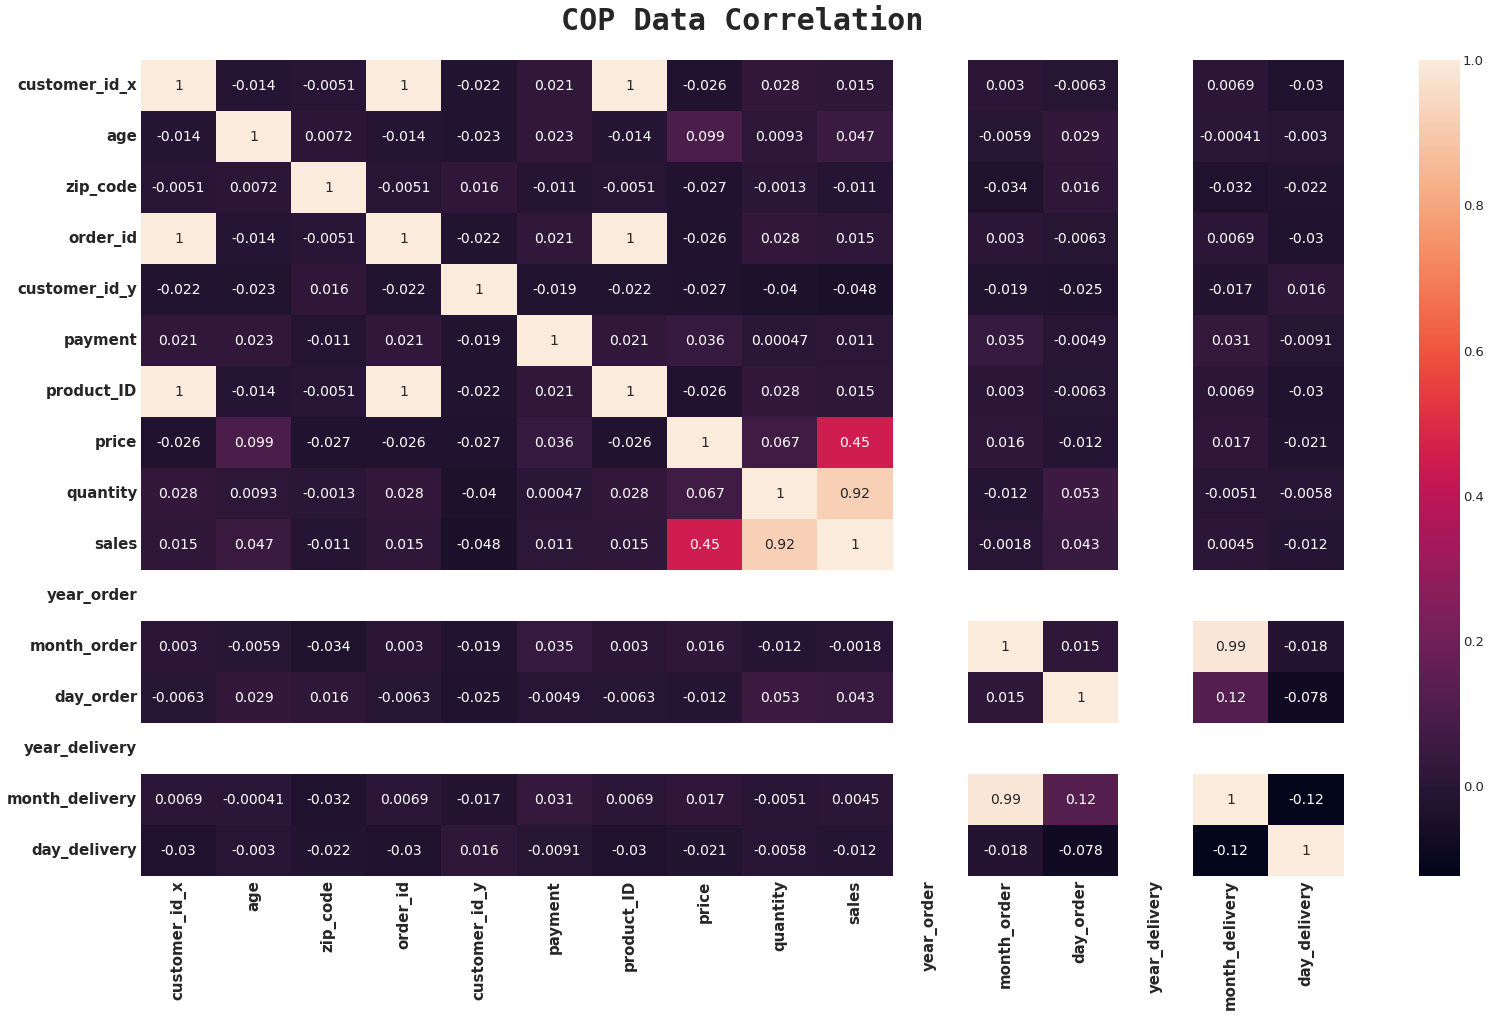

In [18]:
sns.set_style("whitegrid") # set the seaborn style
# let's make a correlation matrix for `cop_data`
plt.figure(figsize=(24, 14)) # figure the size
sns.heatmap(cop_data.corr(), annot=True) # create a heatmap
plt.title("COP Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [19]:
# Let's see the correlation from `cop_data`
(cop_data.corr()["sales"] # transform it into data corr
         .sort_values(ascending=False) # sort values
         .to_frame() # change it into data frame
         .T) # transpose

,sales,quantity,price,age,day_order,customer_id_x,order_id,product_ID,payment,month_delivery,month_order,zip_code,day_delivery,customer_id_y,year_order,year_delivery
sales,1.0,0.918043,0.450207,0.047032,0.042621,0.015294,0.015294,0.015294,0.011012,0.00446,-0.001763,-0.010807,-0.012453,-0.047699,NaN,NaN


> If we look at the visualization and also the values ​​that we have printed above, we can see that `quantity`, `price`, and `sales`, have a good correlation with `sales`, this is because the two features are closely related, for example, `quantity` affects the number of `sales`, because if the `quantity` of products is good and large, and the `price` is also high, then the number of `sales` is also the same.

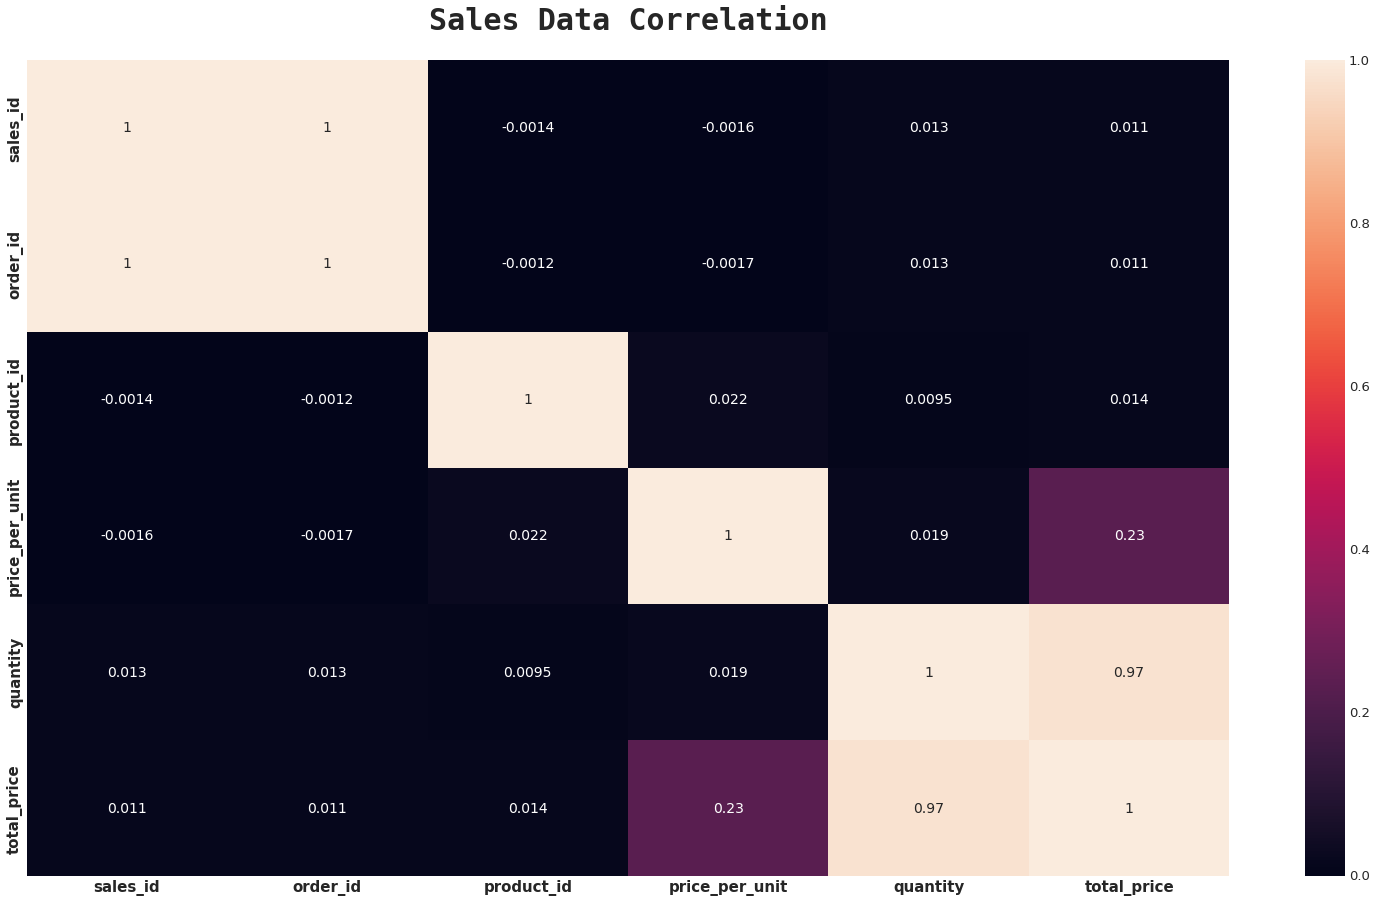

In [20]:
# let's make a correlation matrix for `sales`
plt.figure(figsize=(24, 14)) # figure the size
sns.heatmap(sales.corr(), annot=True) # construct the heatmap
plt.title("Sales Data Correlation", weight="bold", fontsize=30, fontname="monospace", pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

In [21]:
# Let's see the correlation
(sales.corr()["total_price"] # transform it into data corr
      .sort_values(ascending=False) # sort the values
      .to_frame() # change it into data frame
      .T) # transpose 

,total_price,quantity,price_per_unit,product_id,order_id,sales_id
total_price,1.0,0.973141,0.232178,0.013958,0.011283,0.011228


> Great!, let's have a look for the Statistical Measure...

## **Statistical Measure**

Let's have a look to the statistical measure in both of data...

In [22]:
cop_data.describe(include=[np.number]) # Let's have a look to the discrete and continuous data first

,customer_id_x,age,zip_code,order_id,customer_id_y,payment,product_ID,price,quantity,sales,year_order,month_order,day_order,year_delivery,month_delivery,day_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,500.500000,49.860000,5004.872000,500.500000,506.640000,33972.936000,499.500000,108.095000,60.371000,6532.937000,2021.0,5.376000,15.562000,2021.0,5.841000,15.508000
std,288.819436,17.647828,2884.497332,288.819436,277.115502,14451.609047,288.819436,9.158048,11.606812,1408.645064,0.0,2.847584,8.614776,0.0,2.907606,8.636813
min,1.000000,20.000000,2.000000,1.000000,1.000000,10043.000000,0.000000,90.000000,40.000000,3690.000000,2021.0,1.000000,1.000000,2021.0,1.000000,1.000000
25%,250.750000,34.000000,2401.750000,250.750000,275.250000,21329.250000,249.750000,102.000000,50.000000,5405.000000,2021.0,3.000000,8.000000,2021.0,3.000000,8.000000
50%,500.500000,50.000000,5083.000000,500.500000,515.000000,33697.500000,499.500000,112.000000,61.000000,6454.000000,2021.0,5.000000,16.000000,2021.0,6.000000,15.000000
75%,750.250000,65.000000,7460.250000,750.250000,737.250000,46249.000000,749.250000,115.000000,70.000000,7656.750000,2021.0,8.000000,23.000000,2021.0,8.000000,23.000000
max,1000.000000,80.000000,9998.000000,1000.000000,1000.000000,59910.000000,999.000000,119.000000,80.000000,9520.000000,2021.0,10.000000,31.000000,2021.0,11.000000,31.000000


> Hmm.. okay, next..

In [23]:
sales.describe(include=[np.number]) # Let's have a look to sales data

,sales_id,order_id,product_id,price_per_unit,quantity,total_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2499.500000,503.038200,634.053200,103.501600,1.99240,206.360000
std,1443.520003,285.964418,363.255794,9.195004,0.80751,86.357457
min,0.000000,1.000000,1.000000,90.000000,1.00000,90.000000
25%,1249.750000,258.000000,323.000000,95.000000,1.00000,112.000000
50%,2499.500000,504.500000,635.000000,102.000000,2.00000,204.000000
75%,3749.250000,749.000000,951.000000,112.000000,3.00000,285.000000
max,4999.000000,999.000000,1259.000000,119.000000,3.00000,357.000000


> Great! let's have a look to the categorical type...

In [24]:
cop_data.describe(exclude=[np.number]) # Let's have a look to categorical data

,customer_name,gender,home_address,city,state,country,order_date,delivery_date,product_type,product_name,size,colour,description
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,8,1000,961,8,1,291,305,3,28,5,7,1000
top,Leanna Busson,Male,8606 Victoria TerraceSuite 560,East Sophia,South Australia,Australia,2021-06-20 00:00:00,2021-08-09 00:00:00,Shirt,Denim,XS,red,"A red coloured, XS sized, Oxford Cloth Shirt"
freq,1,143,1,3,139,1000,10,9,420,70,200,145,1
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-24 00:00:00,2021-11-20 00:00:00,NaN,NaN,NaN,NaN,NaN


In [25]:
try:
    sales.describe(exclude=[np.number]) # Let's see on sales data
except ValueError as error:
    print(error)

No objects to concatenate


> Okay, we know that on the sales data is not categorical type, but, just for sure, I'm check that twice..

> Okay let's go to the univariate analysis...

## **Univariate Analysis**

Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.

In [26]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title(title1, weight="bold", fontname="monospace",
                  fontsize=25, pad=30) # set the title 1
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title(title2, weight="bold", fontname="monospace",
                  fontsize=25, pad=30) # set the title 2
    
    return fig # returning the figure

## **Customer, Order, and Product Data**

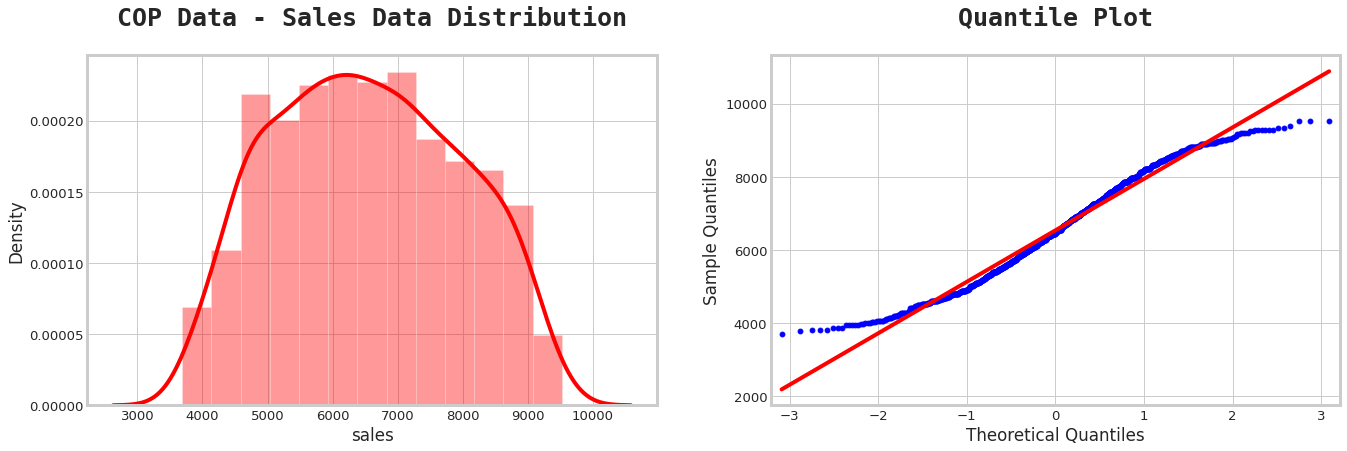

In [27]:
# Sales Data
univariate_analysis( # call the function
    data=cop_data['sales'], # put the data
    color='red', # pick the color
    title1='COP Data - Sales Data Distribution', # title1
    title2='Quantile Plot'); # title2

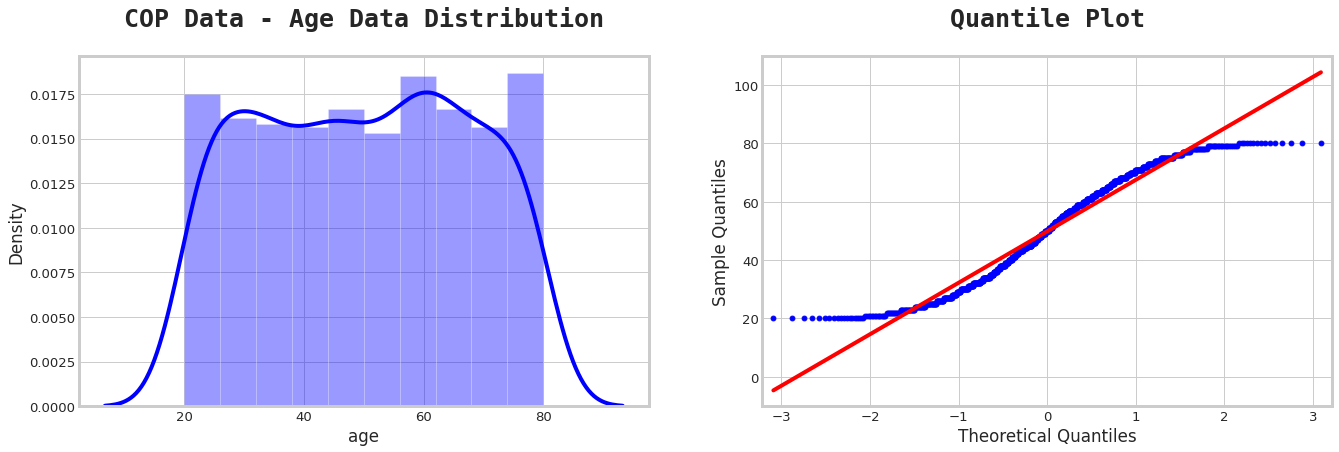

In [28]:
# Age Data
univariate_analysis( # call the function
    data=cop_data['age'], # put the data
    color='blue', # pick the color
    title1='COP Data - Age Data Distribution', # title1
    title2='Quantile Plot'); # title2

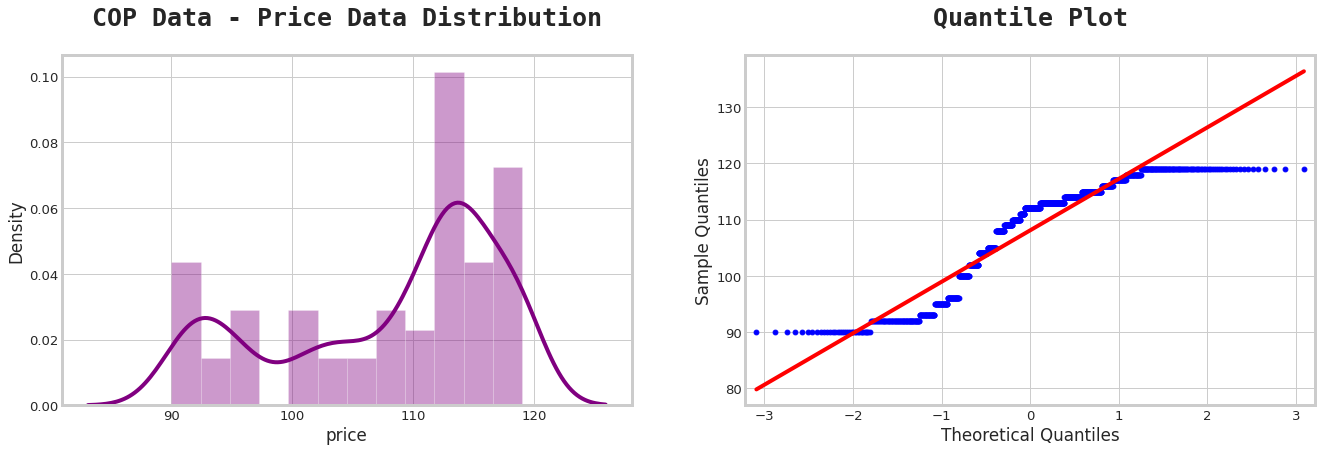

In [29]:
# Price Data
univariate_analysis( # call the function
    data=cop_data['price'], # put the data
    color='purple', # pick the color
    title1='COP Data - Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

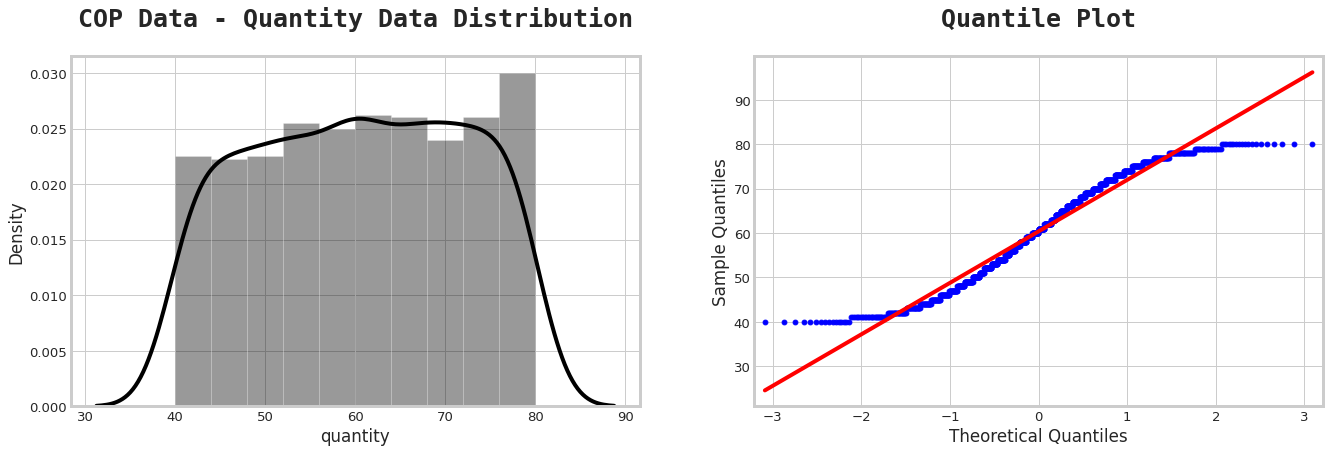

In [30]:
# Quantity Data
univariate_analysis( # call the function
    data=cop_data['quantity'], # put the data
    color='black', # pick the color
    title1='COP Data - Quantity Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [31]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = cop_data.skew().sort_values(ascending=False)
skew_value

sales             0.084784
day_delivery      0.059780
payment           0.059065
day_order         0.044548
month_order       0.020822
month_delivery    0.013124
customer_id_x     0.000000
order_id          0.000000
product_ID        0.000000
year_order        0.000000
year_delivery     0.000000
age              -0.009716
zip_code         -0.014961
quantity         -0.048909
customer_id_y    -0.069053
price            -0.683099
dtype: float64

> Hmm, if we look the output above, look like the `sales` - `payment` and `customer_id_y` - `price` is skewed...

## **Sales Data**

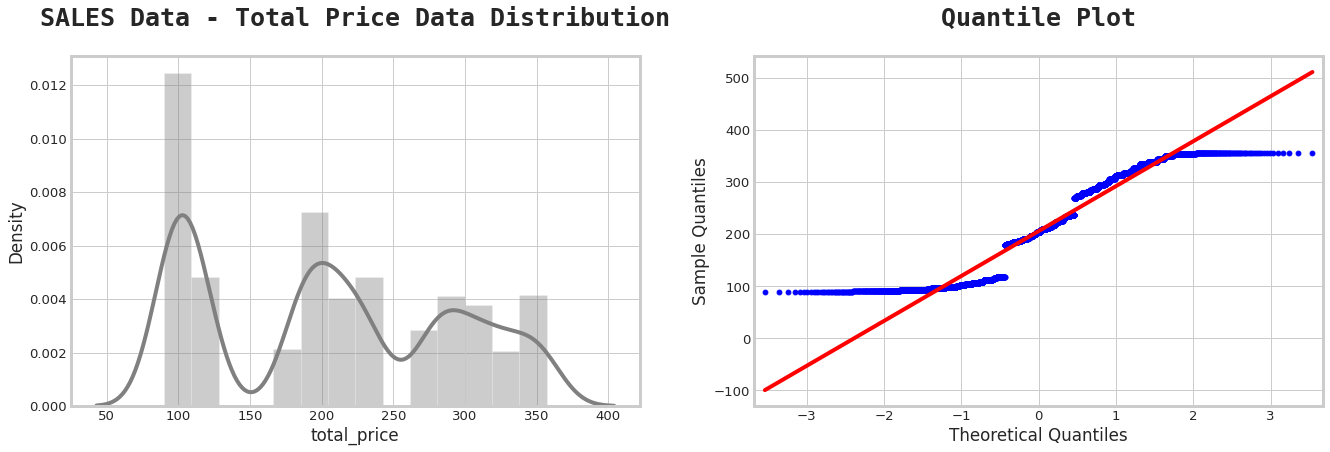

In [32]:
# Price Data
univariate_analysis( # call the function
    data=sales['total_price'], # put the data
    color='grey', # pick the color
    title1='SALES Data - Total Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

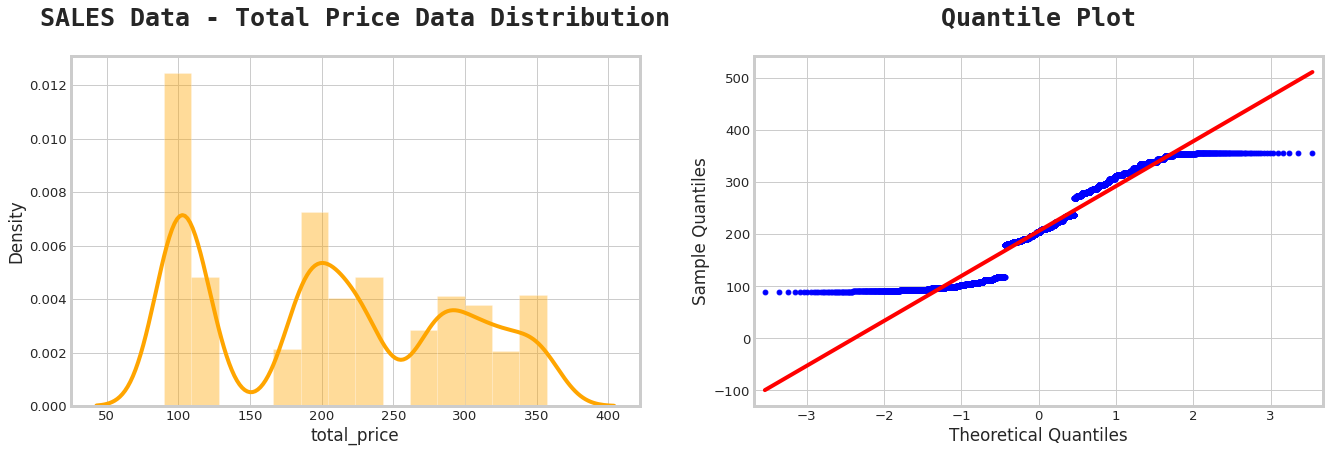

In [33]:
# Total Price Data
univariate_analysis( # call the function
    data=sales['total_price'], # put the data
    color='orange', # pick the color
    title1='SALES Data - Total Price Data Distribution', # title1
    title2='Quantile Plot'); # title2

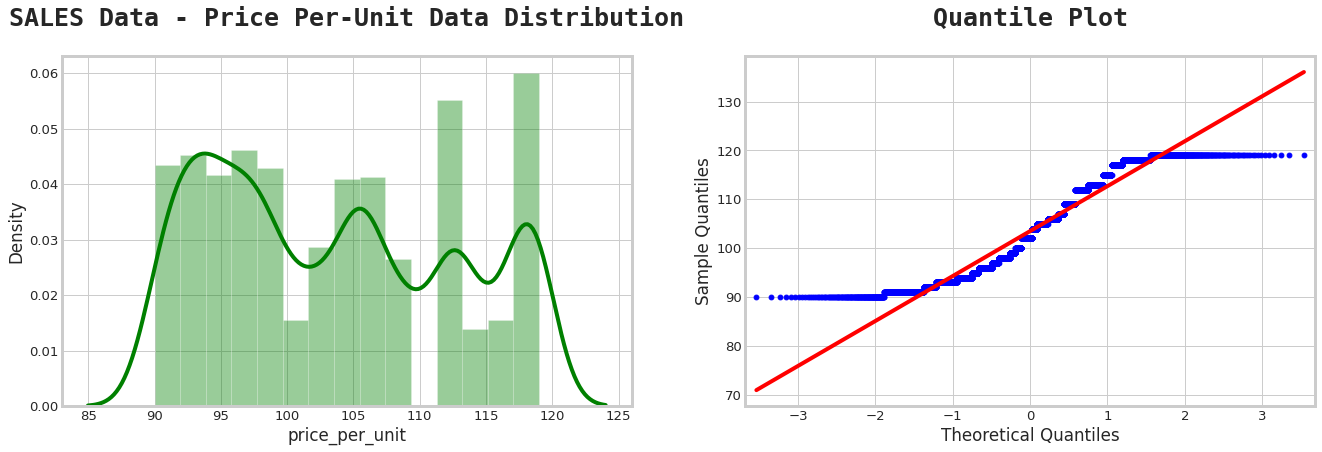

In [34]:
# Price per-unit Data
univariate_analysis( # call the function
    data=sales['price_per_unit'], # put the data
    color='green', # pick the color
    title1='SALES Data - Price Per-Unit Data Distribution', # title1
    title2='Quantile Plot'); # title2

In [35]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = sales.skew().sort_values(ascending=False)
skew_value

price_per_unit    0.256430
total_price       0.137222
quantity          0.013805
sales_id          0.000000
order_id         -0.003729
product_id       -0.021139
dtype: float64

> Hmm, great! `price_per_unit` - `quantity` is not skewed, otherwise skewed...

> Okay, let's go to the Question that have been asked in Inspiration...

## **Which products were sold the most in the last month?**

In [36]:
(cop_data.groupby(["month_order", "product_type", "product_name"])["sales"] # groupping
        .sum() # sum
        .astype("int") # change the type 
        .sort_values(ascending=False) # sort the values
        .to_frame() # change it into data frame
        .head(17) # look the first 17 rows
        .T) # Transpose

month_order       4        8      2        9         1       6      1       9       1      6  \
product_type  Shirt   Jacket  Shirt Trousers    Jacket   Shirt  Shirt  Jacket  Jacket  Shirt   
product_name  Denim Cardigan  Dress   Chinos Shearling Flannel   Polo Leather Leather  Linen   
sales         63480    54044  52241    50500     49495   49152  47970   47573   47121  46516   

month_order       3          7        1      6        7                        8  
product_type Jacket   Trousers Trousers Jacket    Shirt   Jacket           Shirt  
product_name  Parka Drawstring    Cords Puffer Chambray Pullover Mandarin Collar  
sales         45696      45136    45087  43670    42945    42750           42660

### ***Answer:***

> The question is said that **Which products were sold the most in the last month?** that mean we're now in **October**, which mean the **last month** is **September** *(cmiiw)*, and if we see the output above, we can see that the most *Product Type* that sold the most is a **Trousers**, and the *Name of the Product* is **Chinos**, with the $50.500$ (Dollar Australia) of **sales**.

## **How have sales and revenue changed over the past few quarters?**

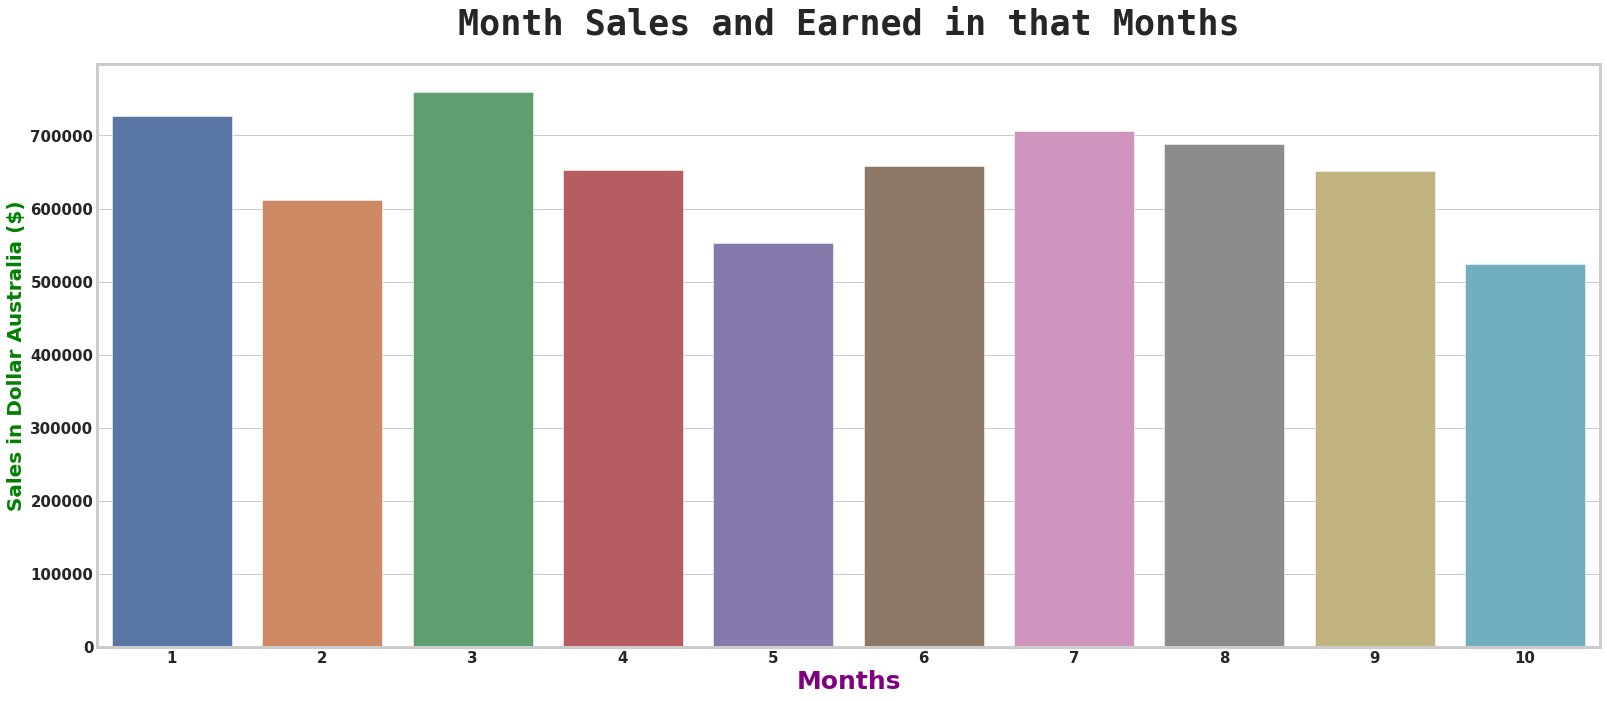

In [37]:
# group the Month cols
sum_month_order = cop_data.groupby(["month_order"]).sum().astype("int")
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot 
sns.barplot(
    x=sum_month_order.index, # x-axis
    y=sum_month_order["sales"], # y-axis
    data=sum_month_order, # data
    palette="deep" # palette
) 
# title 
plt.title(
    "Month Sales and Earned in that Months", 
    fontname="monospace", # fontname
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
# x-label
plt.xlabel( # x-label
    "Months", 
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight 
    fontsize=15 # font-size
);

### ***Answer:***

> If we look at the data visualization above, I think sales and revenue have changed over the last few quarters, you could say there were a few months that saw quite a big increase as well as a pretty big drop, the reason maybe it could be due to the prolonged pandemic and the lockdown in several places in Australia, and also there are other **reasons such as market prices, people's interest in shopping, people's reasons for shopping, product prices, and ingredients to make these products are in short supply, and yes, We don't know, and it's also quite difficult to predict, because that's how the world is, full of uncertain surprises.**

## **Understanding Customer demographics and their preferences**

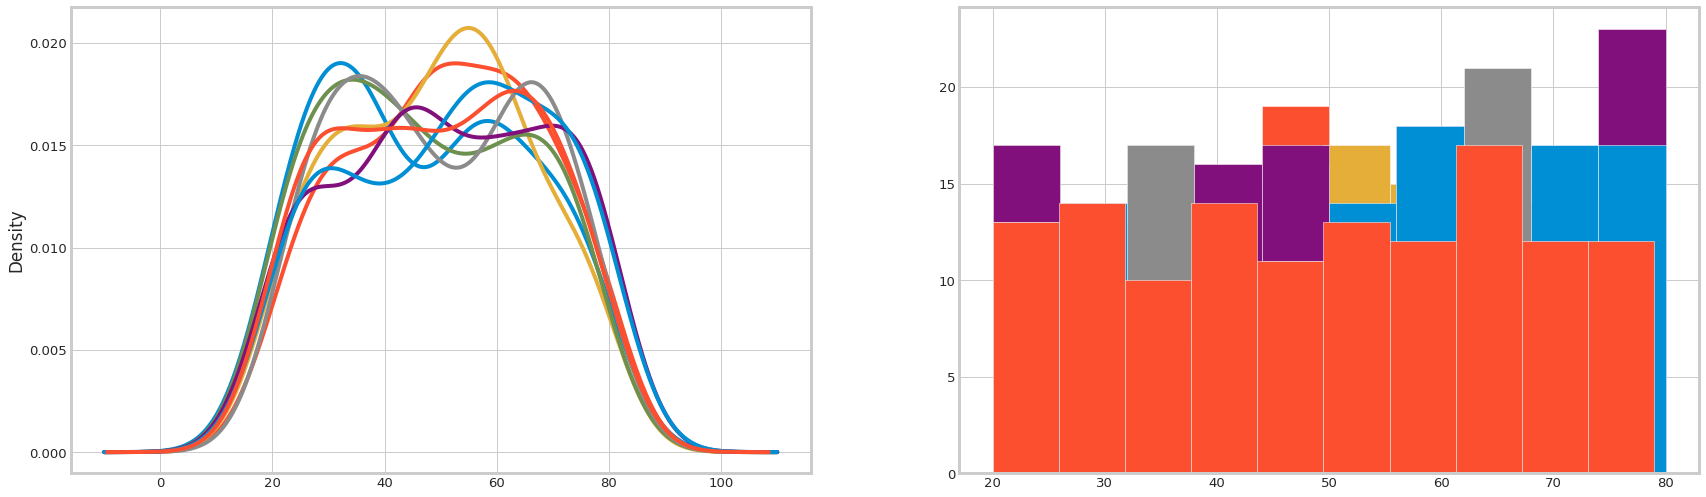

In [38]:
plt.figure(figsize=(26, 8)) # figure the size
plt.subplot(1, 2, 1) # make a subplots for making 2 visualization 
cop_data.groupby("gender").age.plot(kind='kde'); # groupping gender and plot it
plt.subplot(1, 2, 2) # make a subplots for making 2 visualization
cop_data.groupby("gender").age.hist(); # grouping gender and plot it using hist plot

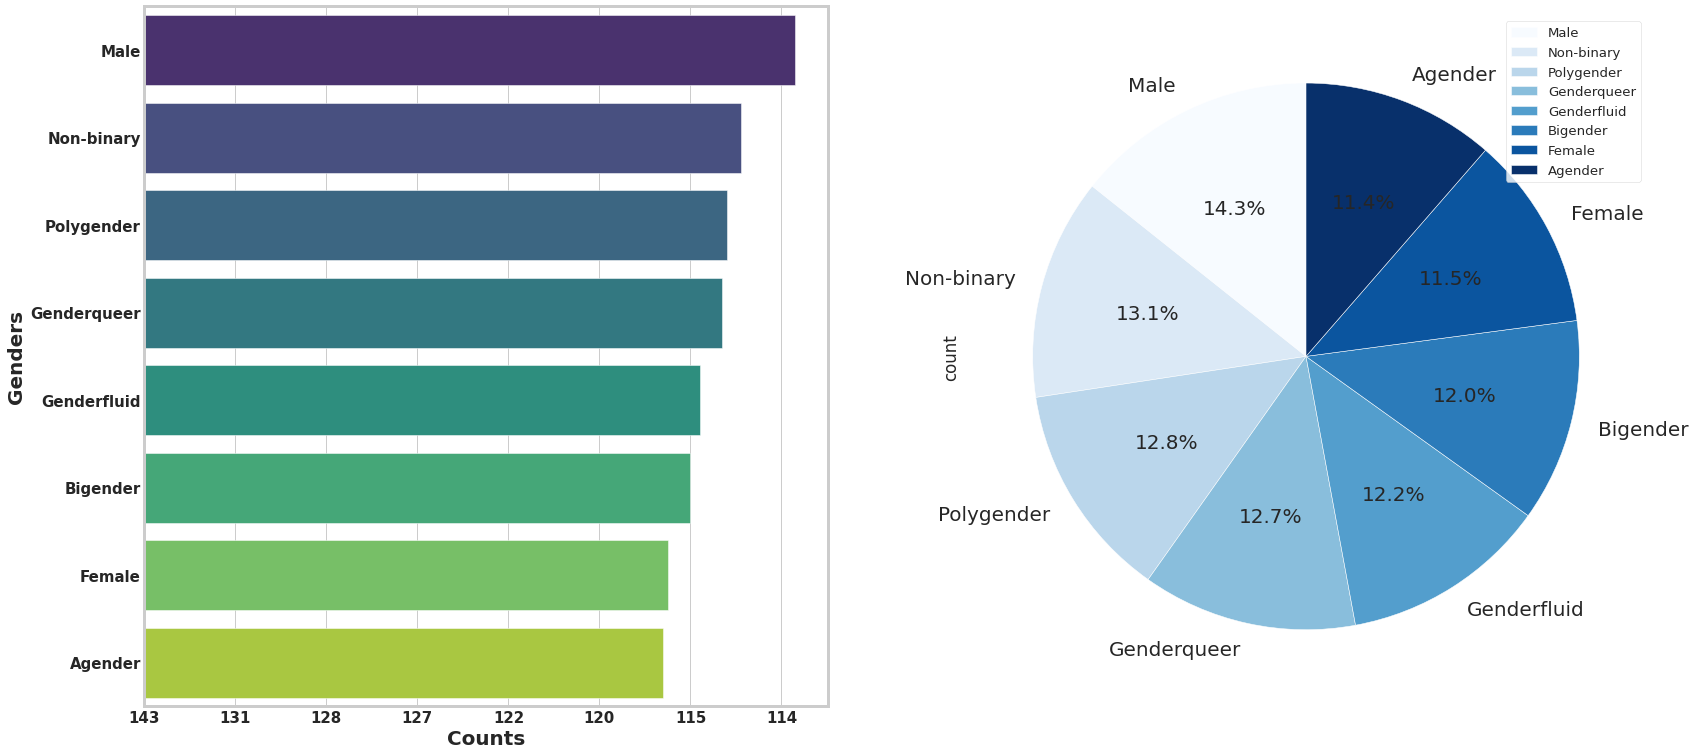

In [39]:
fig, (ax1, ax2) = plt.subplots( # subplots
    ncols=2, # n-cols
    nrows=1, # c-rows
    figsize=(24, 12) # figuring the size
)
sns.barplot( # barplot
    x=cop_data["gender"].value_counts().values, # x-axis
    y=cop_data["gender"].value_counts().index, # y-axis
    palette="viridis", # palette
    ax=ax1 # axes
)
# Prepare data for Pie Plots
cop_pie = {"gender": ["Male", "Non-binary", "Polygender", "Genderqueer", "Genderfluid", "Bigender", "Female", "Agender"], 
           "count": [143, 131, 128, 127, 122, 120, 115, 114]}
cop_pie = pd.DataFrame(cop_pie)
cop_pie.plot( # plot 
    kind="pie", # kind pie of course
    y="count", # y-axis
    labels=cop_pie["gender"], # the labels
    autopct='%1.1f%%', # pct
    startangle=90, # angle
    legend=True, # legend
    colormap=plt.cm.Blues, # cmap
    fontsize=20, # fontsize
    ax=ax2 # axes
)
ax1.set_xlabel( # x-label
    "Counts", 
    weight="bold", # weight
    fontsize=20 # font-size
) 
ax1.set_xticklabels( # x-ticklabels
    labels=cop_pie["count"], # labels 
    weight="bold", # weight
    fontsize=15 # font-size
) 
ax1.set_ylabel( # y-label
    "Genders", 
    weight="bold", # weight
    fontsize=20 # font-size
) 
ax1.set_yticklabels( # y-ticklabels
    labels=cop_pie["gender"], # labels 
    weight="bold", # weight 
    fontsize=15 # font-size
); 

> You know what? If we look at the 4 visualizations above, we can see that the male gender occupies the first position in terms of numbers, and I am also a bit surprised, I think that it will be women who will occupy that position because if you think about it, women like shopping the most. , haha, I can't say no, because this data says otherwise, and also I don't really understand gender **Non-binary, Polygender, Genderfluid, etc...**, because **there are only 2 genders that I know in this world**, is male and female, and the **fact that you were born a normal and healthy female, and a normal and healthy male too of course** should make you **grateful** for what God has given you, but what can i do, everyone's have a different opinions and perspective, and also I have to respect differences of opinion, as well as their perspective.

Let's move on...

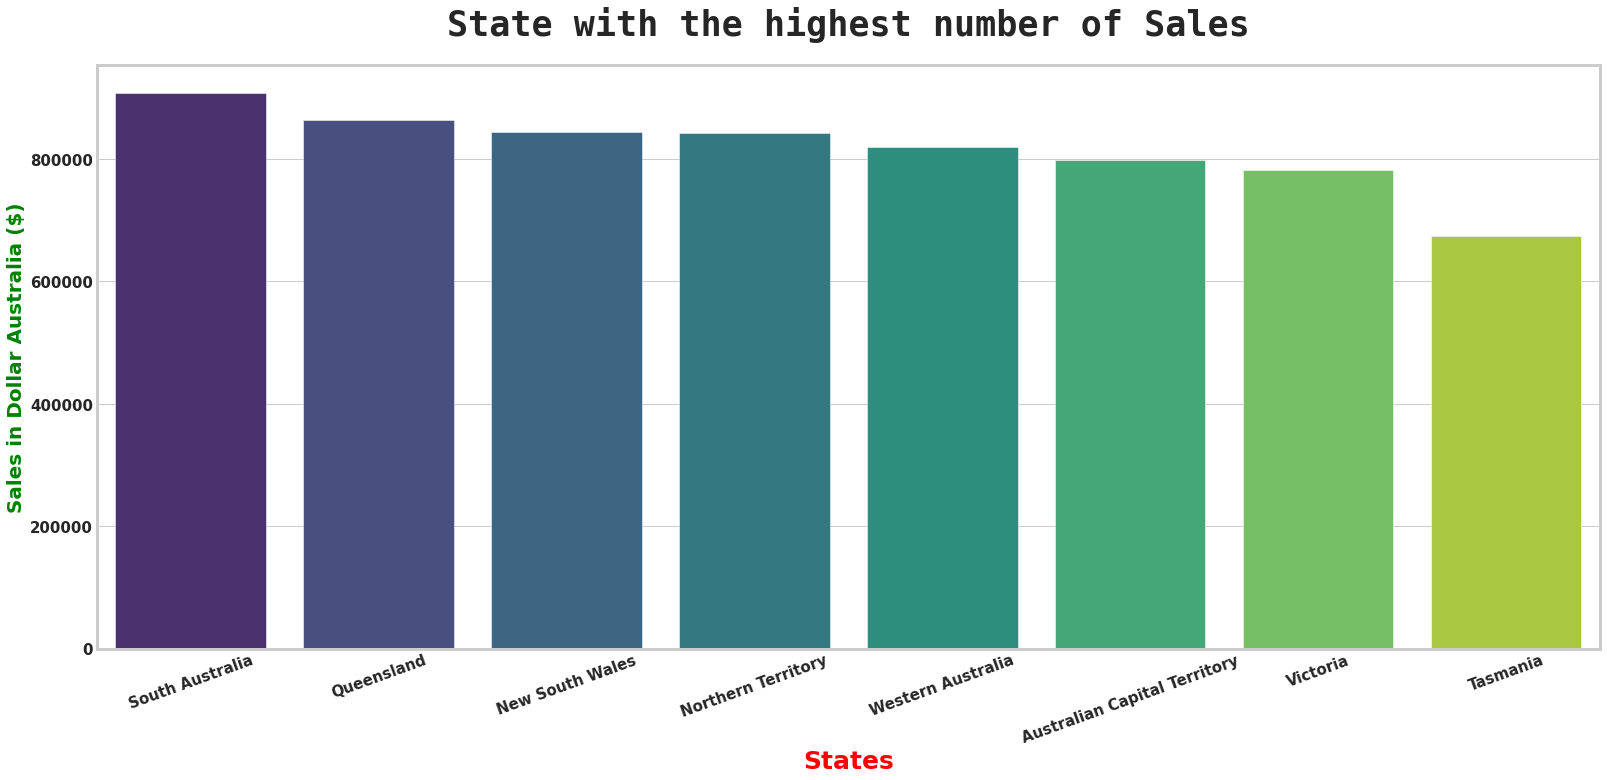

In [40]:
high_state_sales = (cop_data.groupby("state") # groupping
                           .sum() # sum
                           .astype("int")["sales"] # change type into int and get the sales features 
                           .sort_values(ascending=False) # sort the values 
                           .to_frame()) # change it into data frame
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot 
sns.barplot( # barplot
    x=high_state_sales.index, # x-axis
    y="sales", # y-axis
    data=high_state_sales, # data
    palette="viridis" # palette (like cmap)
)
# title
plt.title( # title
    "State with the highest number of Sales", 
    fontname="monospace", # font-name 
    weight="bold", # weight
    fontsize=35, # the size of font 
    pad=30 # padding
)
# x-label
plt.xlabel( # x-label
    "States", 
    weight="bold", # weight
    color="r", # color
    fontsize=25, # fontsize
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=20 # rotate
) 
plt.ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    weight="bold", # weight
    color="g", # color
    fontsize=20, # font-size
    loc="center" # location
)
plt.yticks(  # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

> **South Australia** took first place with the highest total sales of $90,7400$ (Dollar Australia), and **Queensland** took second place with sales of $86,2965$ (Dollar Australia).

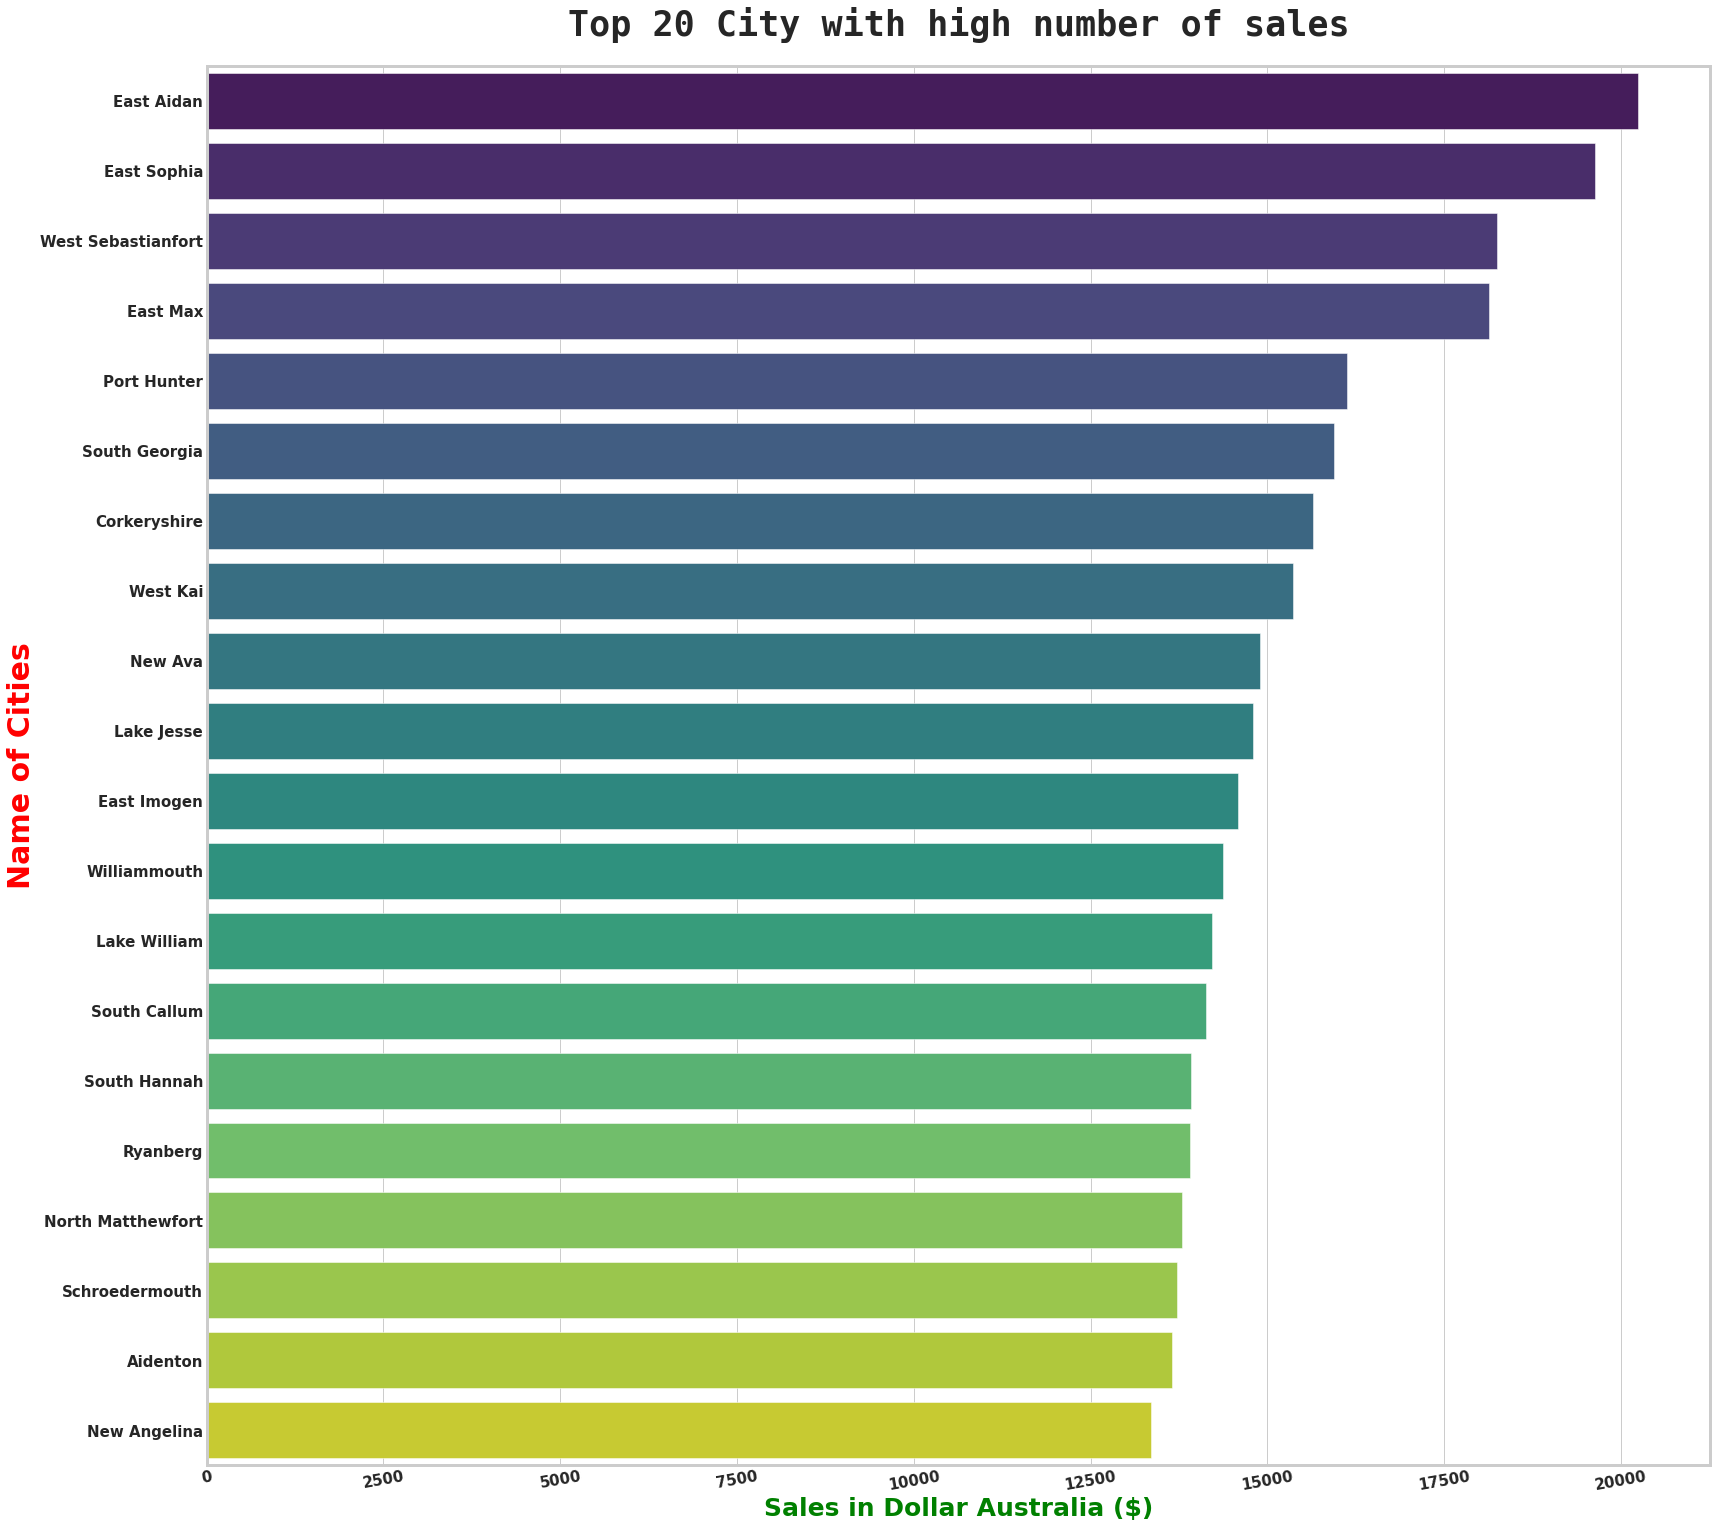

In [41]:
# group of the highest number of sales in city
top_20_city = (cop_data.groupby("city") # groupping
                      .sum() # sum
                      .astype("int")["sales"] # change type into int and get the sales features
                      .sort_values(ascending=False) # sort values
                      .head(20) # head
                      .to_frame()) # change it into data frame
# let's plot it
plt.figure(figsize=(24, 24)) # figuring the size
sns.barplot( # barplot
    x="sales", # x-axis
    y=top_20_city.index, # y-axis 
    data=top_20_city, # data
    palette="viridis" # palette (colormap)
)
plt.title( # title
    "Top 20 City with high number of sales", 
    fontname="monospace",  # font-name
    weight="bold",  # weight
    fontsize=35, # size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Sales in Dollar Australia ($)", 
    weight="bold", # weight
    color="g", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10 # rotation
) 
plt.ylabel( # y-label
    "Name of Cities", 
    weight="bold", # weight
    color="r", # color
    fontsize=30, # font-size
    loc="center" # location
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

> **East Aidan** occupies the first position in the city with the highest number of sales with total sales of $20247$ (USD), and the second position is occupied by **East Sophia** with total sales of $19628$ (Dollar Australia).

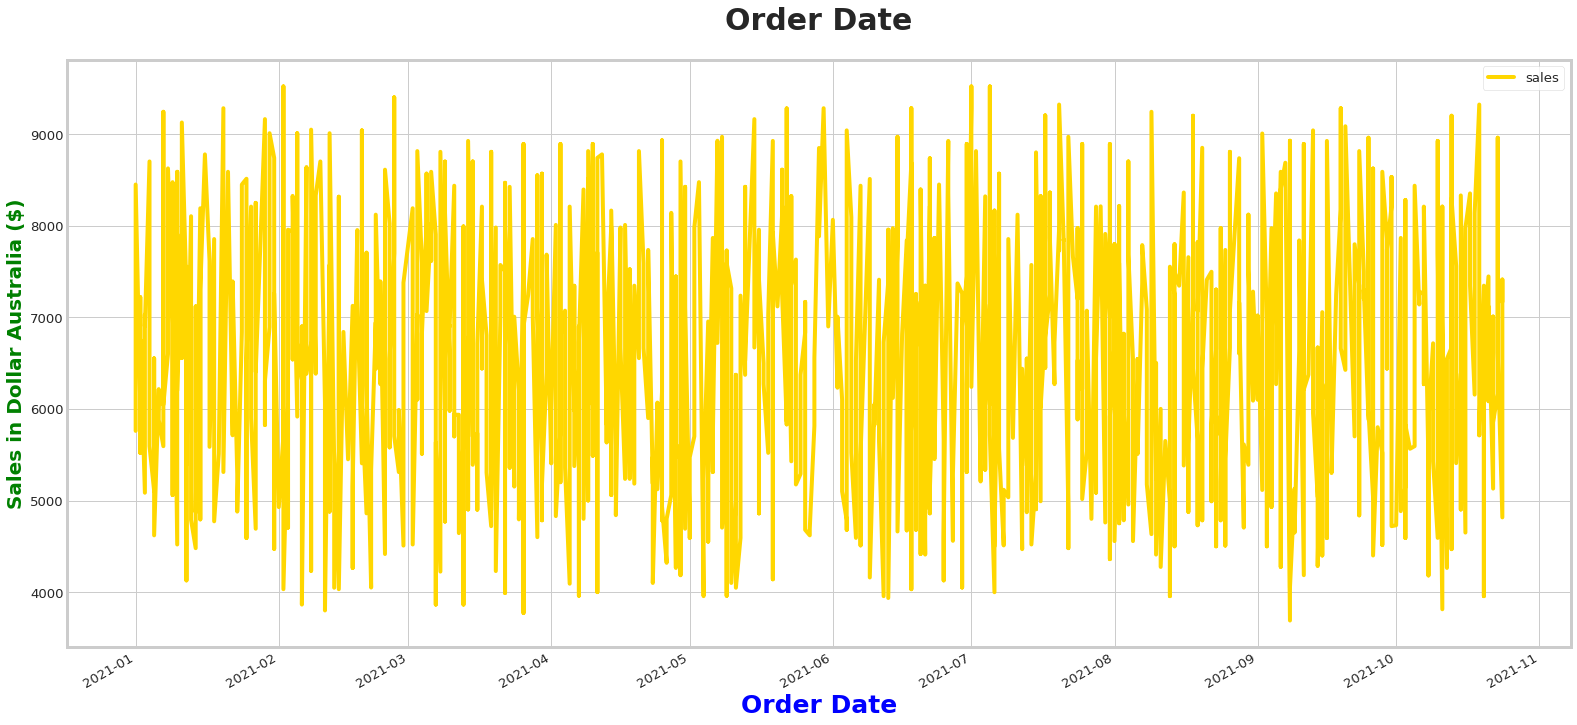

In [42]:
fig, ax = plt.subplots( # the figure and axes
    figsize=(24, 12) # the figure size 
)
cop_data.plot( # plotting
    x="order_date", # x-axis
    y="sales", # y-axis
    color="gold", # color
    ax=ax # axes
)
ax.set_title( # title
    "Order Date", 
    fontsize=30, # font-size
    weight="bold", # weight
    pad=30 # padding
) 
ax.set_ylabel( # y-label
    "Sales in Dollar Australia ($)", 
    weight="bold", # weight
    fontsize=20, # font-size
    color="green", # color
    loc="center" # location
)
ax.set_xlabel( # x-label
    "Order Date", 
    weight="bold", # weight
    fontsize=25, # font-size
    color="blue", # color
    loc="center" # location
); 

> Hmm... interesting, there are so many increases and decreases in **sales** that occur every month, well... that is indeed of natural, because, I have said before, to predict market prices, people's interest in shopping, people's reasons For shopping, product prices, and materials to make these products are in short supply, or just production declines due to the policies of every company during a pandemic like this, we don't know, and it's also quite difficult to predict, because that's how the world is, full of surprises. not sure, but if we look at the **average** of the **sales** **order date** every month, the value is quite good, which is $6532,937$ (Dollar Australia).

#### ***Reference: [Sales Data Deep Analysis](https://www.kaggle.com/knightbearr/sales-data-deep-analysis-knightbearr)***

# **On Going...**

> My plan is to go through feature (question) by feature and take closer look those features to inspect their relationships with previous features. So it's gonna take a while to finish this notebook with all features involved. I'm planning to update it regulary whenever I have free time.